# Tabel of Content

- [Model1](#Model1)

- [Model2](#Model2)

- [Model3](#Model3)

- [Model4](#Model4)

- [Model5](#Model5)

## Model1

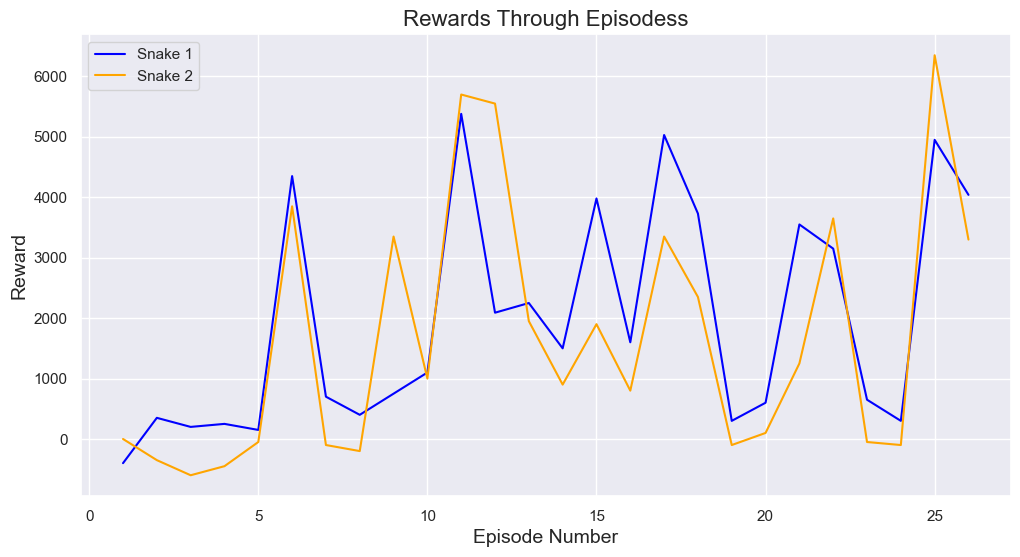

error: display Surface quit

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

: 

In [1]:
import pygame
import random
import numpy as np
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

# Constants
SNAKE_1_Q_TABLE = "s1_qtble.npy"
SNAKE_2_Q_TABLE = "s2_qtble.npy"

WIDTH = 500
HEIGHT = 500
ROWS = 20

# Hyperparameters
ALPHA = 0.1  # Learning rate
GAMMA = 0.95  # Discount factor
EPSILON = 0.05  # Exploration rate
EPSILON_DECAY = 0.1

class Cube:
    rows = 20
    w = 500

    def __init__(self, start, dirnx=1, dirny=0, color=(255, 0, 0)):
        self.pos = start
        self.dirnx = dirnx
        self.dirny = dirny
        self.color = color

    def move(self, dirnx, dirny):
        self.dirnx = dirnx
        self.dirny = dirny
        self.pos = (self.pos[0] + self.dirnx, self.pos[1] + self.dirny)

    def draw(self, surface, eyes=False):
        dis = self.w // self.rows
        i = self.pos[0]
        j = self.pos[1]

        pygame.draw.rect(surface, self.color, (i * dis + 1, j * dis + 1, dis - 2, dis - 2))
        
        if eyes:
            centre = dis // 2
            radius = 3
            circleMiddle = (i * dis + centre - radius, j * dis + 8)
            circleMiddle2 = (i * dis + dis - radius * 2, j * dis + 8)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle, radius)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle2, radius)

def redrawWindow(snake_1, snake_2, snack, win):
    win.fill((0, 0, 0))
    drawGrid(WIDTH, ROWS, win)
    snake_1.draw(win)
    snake_2.draw(win)
    snack.draw(win)
    pygame.display.update()

def drawGrid(w, rows, surface):
    sizeBtwn = w // rows
    x = 0
    y = 0
    for l in range(rows):
        x = x + sizeBtwn
        y = y + sizeBtwn
        pygame.draw.line(surface, (255, 255, 255), (x, 0), (x, w))
        pygame.draw.line(surface, (255, 255, 255), (0, y), (w, y))

    wall_color = (139, 69, 19)  # Brown color
    for i in range(rows):
        pygame.draw.rect(surface, wall_color, (0, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, ((rows - 1) * sizeBtwn, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, 0, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, (rows - 1) * sizeBtwn, sizeBtwn, sizeBtwn))

def randomSnack(rows, item):
    positions = item.body
    while True:
        x = random.randrange(1, rows - 1)
        y = random.randrange(1, rows - 1)
        if len(list(filter(lambda z: z.pos == (x, y), positions))) > 0:
            continue
        else:
            break
    return (x, y)

def save(snake_1, snake_2):
    snake_1.save_q_table(SNAKE_1_Q_TABLE)
    snake_2.save_q_table(SNAKE_2_Q_TABLE)

def reset(snake_1, snake_2):
    snake_1.reset((5, 5))
    snake_2.reset((15, 15))

class Snake:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
            pass
        except:
            pass
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = ALPHA
        self.discount_factor = GAMMA
        self.epsilon = EPSILON
        self.ep_decay = EPSILON_DECAY

    def get_optimal_policy(self, state):
        action = np.argmax(self.q_table[state])
        if action == 0:  # Left
            if (self.dirnx != 1):
                return action
            else:
                return np.argsort(self.q_table[state])[-2]
        elif action == 1:  # Right
            if (self.dirnx != -1):
                return action
            else:
                return np.argsort(self.q_table[state])[-2]
        elif action == 2:  # Up
            if (self.dirny != 1):
                return action
            else:
                return np.argsort(self.q_table[state])[-2]
        elif action == 3:  # Down
            if (self.dirny != -1):
                return action
            else:
                return np.argsort(self.q_table[state])[-2]

    def make_action(self, state):
        chance = random.random()
        if chance < self.epsilon:
            action = random.randint(0, 3)
        else:
            action = self.get_optimal_policy(state)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.epsilon *= self.ep_decay
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 
        return


    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < 20 and r >= 0 and c < 20 and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = snack.pos[0], snack.pos[1]
        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -500
            win_other = True
            reset(self, other_snake)

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 100

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 500
            win_other = True
            reset(self, other_snake)

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 500
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 80
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    reward -= 400
                    win_other = True
            reset(self, other_snake)

        state = self.get_state(snack, other_snake)
        for i in range(4):
            if (state[i] == 1 and state[i+4] == 1):
                reward += 50
            elif (state[i] == 1 and state[i+4] == 0):
                reward -= 50

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)

def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))

    snake_1 = Snake((255, 0, 0), (0, 0), SNAKE_1_Q_TABLE)
    snake_2 = Snake((255, 255, 0), (5, 5), SNAKE_2_Q_TABLE)
    snake_1.addCube()
    snake_2.addCube()

    snack = Cube(randomSnack(ROWS, snake_1), color=(0, 255, 0))

    clock = pygame.time.Clock()
    
    episode = 0
    sum_reward_1 = 0
    sum_reward_2 = 0
    episodes = []
    rewards1 = []
    rewards2 = []

    while True:
        reward_1 = 0
        reward_2 = 0
        # pygame.time.delay(25)
        # clock.tick(10)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                if messagebox.askokcancel("Quit", "Do you want to save the Q-tables?"):
                    save(snake_1, snake_2)
                pygame.quit()
                exit()
            if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
                np.save(SNAKE_1_Q_TABLE, snake_1.q_table)
                np.save(SNAKE_2_Q_TABLE, snake_2.q_table)
                # pygame.time.delay(1000)

        state_1, new_state_1, action_1 = snake_1.move(snack, snake_2)
        state_2, new_state_2, action_2 = snake_2.move(snack, snake_1)

        snack, reward_1, win_1, win_2 = snake_1.calc_reward(snack, snake_2)
        snack, reward_2, win_2, win_1 = snake_2.calc_reward(snack, snake_1)

        snake_1.update_q_table(state_1, action_1, new_state_1, reward_1)
        snake_2.update_q_table(state_2, action_2, new_state_2, reward_2)

        redrawWindow(snake_1, snake_2, snack, win)

        sum_reward_1 += reward_1
        sum_reward_2 += reward_2
        if (win_1 or win_2):
            episode += 1
            episodes.append(episode)
            rewards1.append(sum_reward_1)
            rewards2.append(sum_reward_2)
            sns.set_theme()
            plt.figure(figsize=(12, 6))  
            plt.plot(episodes, rewards1, linestyle='-', color = "blue", label = "Snake 1")
            plt.plot(episodes, rewards2, linestyle='-', color = "orange", label = "Snake 2")
            plt.xlabel('Episode Number', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title('Rewards Through Episodess', fontsize=16)
            plt.legend()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.clf()

            sum_reward_1 = 0
            sum_reward_2 = 0

if __name__ == "__main__":
    main()


# Model2

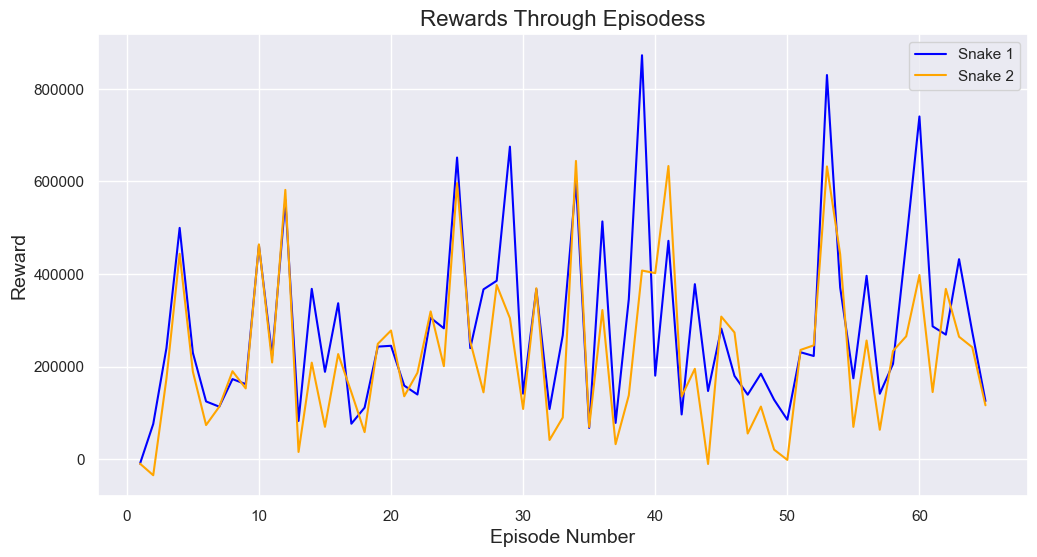

error: display Surface quit

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

: 

In [1]:
import pygame
import random
import numpy as np
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display



# Constants
SNAKE_1_Q_TABLE = "s1_qtble.npy"
SNAKE_2_Q_TABLE = "s2_qtble.npy"


WIDTH = 500
HEIGHT = 500
ROWS = 20

# Hyperparameters
ALPHA = 0.1  # Learning rate
GAMMA = 0.95  # Discount factor
EPSILON = 0.005  # Exploration rate
EPSILON_DECAY = 0.1

class Cube:
    rows = 20
    w = 500

    def __init__(self, start, dirnx=1, dirny=0, color=(255, 0, 0)):
        self.pos = start
        self.dirnx = dirnx
        self.dirny = dirny
        self.color = color

    def move(self, dirnx, dirny):
        self.dirnx = dirnx
        self.dirny = dirny
        self.pos = (self.pos[0] + self.dirnx, self.pos[1] + self.dirny)

    def draw(self, surface, eyes=False):
        dis = self.w // self.rows
        i = self.pos[0]
        j = self.pos[1]

        pygame.draw.rect(surface, self.color, (i * dis + 1, j * dis + 1, dis - 2, dis - 2))
        
        if eyes:
            centre = dis // 2
            radius = 3
            circleMiddle = (i * dis + centre - radius, j * dis + 8)
            circleMiddle2 = (i * dis + dis - radius * 2, j * dis + 8)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle, radius)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle2, radius)

def redrawWindow(snake_1, snake_2, snack, win):
    win.fill((0, 0, 0))
    drawGrid(WIDTH, ROWS, win)
    snake_1.draw(win)
    snake_2.draw(win)
    snack.draw(win)
    pygame.display.update()

def drawGrid(w, rows, surface):
    sizeBtwn = w // rows
    x = 0
    y = 0
    for l in range(rows):
        x = x + sizeBtwn
        y = y + sizeBtwn
        pygame.draw.line(surface, (255, 255, 255), (x, 0), (x, w))
        pygame.draw.line(surface, (255, 255, 255), (0, y), (w, y))

    wall_color = (139, 69, 19)  # Brown color
    for i in range(rows):
        pygame.draw.rect(surface, wall_color, (0, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, ((rows - 1) * sizeBtwn, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, 0, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, (rows - 1) * sizeBtwn, sizeBtwn, sizeBtwn))

def randomSnack(rows, item):
    positions = item.body
    while True:
        x = random.randrange(1, rows - 1)
        y = random.randrange(1, rows - 1)
        if len(list(filter(lambda z: z.pos == (x, y), positions))) > 0:
            continue
        else:
            break
    return (x, y)

def save(snake_1, snake_2):
    snake_1.save_q_table(SNAKE_1_Q_TABLE)
    snake_2.save_q_table(SNAKE_2_Q_TABLE)

def reset(snake_1, snake_2):
    snake_1.reset((5, 5))
    snake_2.reset((15, 15))

class Snake:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
        except:
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = ALPHA
        self.discount_factor = GAMMA
        self.epsilon = EPSILON
        self.ep_decay = EPSILON_DECAY
        self.iter = 0

    def get_death_pos(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for i, c in enumerate(self.body): 
            board[c.pos[0], c.pos[1]] = 1
        for i, c in enumerate(other_snake.body):
            board[c.pos[0], c.pos[1]] = 1
        board[self.head.pos[0], self.head.pos[1]] = 1
        board[other_snake.head.pos[0], other_snake.head.pos[1]] = 1
        return board

    def get_optimal_policy(self, state, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        death_pos = self.get_death_pos(other_snake)
        for i in range(4):
            action = list(reversed(np.argsort(self.q_table[state])))[i]
            if action == 0 and self.dirnx != 1 and death_pos[head_r-1, head_c] == 0:  # Left
                break
            elif action == 1 and self.dirnx != -1 and death_pos[head_r+1, head_c] == 0:  # Right
                break
            elif action == 2 and self.dirny != 1 and death_pos[head_r, head_c-1] == 0:  # Up
                break
            elif action == 3 and self.dirny != -1 and death_pos[head_r, head_c+1] == 0:  # Down
                break
            else:
                continue
        return action

    def make_action(self, state, other_snake, flag):
        chance = random.random()
        if chance < self.epsilon:
            action = random.randint(0, 3)
        else:
            action = self.get_optimal_policy(state, other_snake)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.epsilon *= self.ep_decay
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 

    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < ROWS and r >= 0 and c < ROWS and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = snack.pos[0], snack.pos[1]
        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state, other_snake, False)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def is_right_path(self, state):
        sum = 0
        for i in range(4):
            sum += state[i+4]
        if sum == 1:
            return True
        else:
            return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -10000
            win_other = True
        elif other_snake.check_out_of_board():
            win_self = True

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 20000

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 10000
            win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, other_snake.body[1:])):
            win_self = True

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 10000
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 100
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    reward -= 1000
                    win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, self.body)):
            if self.head.pos != other_snake.head.pos:
                win_self = True
            else:
                if len(other_snake.body) > len(self.body):
                    win_other = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                    reset(self, other_snake)
                else:
                    win_self = True

        state = self.get_state(snack, other_snake)
        for i in range(4):
            if (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state)):
                reward += 3000
            elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False):
                reward += 10
            elif (state[i] == 1 and state[i+4] == 0):
                reward -= 1000

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)


def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))

    snake_1 = Snake((255, 0, 0), (0, 0), SNAKE_1_Q_TABLE)
    snake_2 = Snake((255, 255, 0), (5, 5), SNAKE_2_Q_TABLE)
    snake_1.addCube()
    snake_2.addCube()

    snack = Cube(randomSnack(ROWS, snake_1), color=(0, 255, 0))

    clock = pygame.time.Clock()
    
    episode = 0
    sum_reward_1 = 0
    sum_reward_2 = 0
    episodes = []
    rewards1 = []
    rewards2 = []
    
    while True:
        reward_1 = 0
        reward_2 = 0
        # pygame.time.delay(25)
        # clock.tick(10)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                if messagebox.askokcancel("Quit", "Do you want to save the Q-tables?"):
                    save(snake_1, snake_2)
                pygame.quit()
                exit()
            if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
                np.save(SNAKE_1_Q_TABLE, snake_1.q_table)
                np.save(SNAKE_2_Q_TABLE, snake_2.q_table)
                # pygame.time.delay(1000)

        state_1, new_state_1, action_1 = snake_1.move(snack, snake_2)
        state_2, new_state_2, action_2 = snake_2.move(snack, snake_1)

        snack, reward_1, win_1, win_2 = snake_1.calc_reward(snack, snake_2)
        snack, reward_2, win_2, win_1 = snake_2.calc_reward(snack, snake_1)

        snake_1.update_q_table(state_1, action_1, new_state_1, reward_1)
        snake_2.update_q_table(state_2, action_2, new_state_2, reward_2)

        redrawWindow(snake_1, snake_2, snack, win)

        sum_reward_1 += reward_1
        sum_reward_2 += reward_2
        if (win_1 or win_2):
            reset(snake_1, snake_2)
            episode += 1
            episodes.append(episode)
            rewards1.append(sum_reward_1)
            rewards2.append(sum_reward_2)
            sns.set_theme()
            plt.figure(figsize=(12, 6))  
            plt.plot(episodes, rewards1, linestyle='-', color = "blue", label = "Snake 1")
            plt.plot(episodes, rewards2, linestyle='-', color = "orange", label = "Snake 2")
            plt.xlabel('Episode Number', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title('Rewards Through Episodess', fontsize=16)
            plt.legend()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.clf()

            sum_reward_1 = 0
            sum_reward_2 = 0

if __name__ == "__main__":
    main()


# Model3

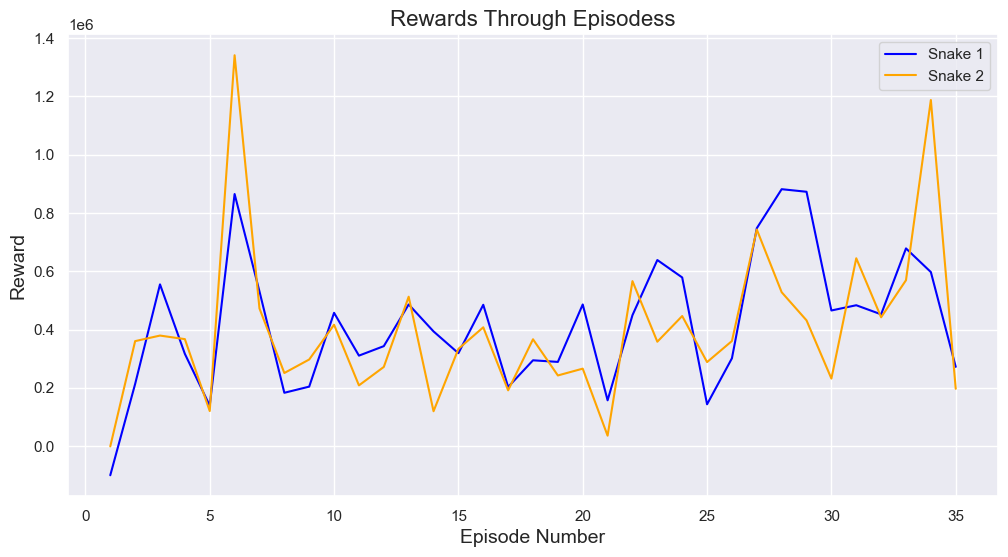

error: display Surface quit

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

: 

In [1]:
import pygame
import random
import numpy as np
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display


# Constants
SNAKE_1_Q_TABLE = "s1_qtble.npy"
SNAKE_2_Q_TABLE = "s2_qtble.npy"


WIDTH = 500
HEIGHT = 500
ROWS = 20

# Hyperparameters
ALPHA = 0.04  # Learning rate
GAMMA = 0.90  # Discount factor
EPSILON = 0.0005  # Exploration rate
EPSILON_DECAY = 0.1

class Cube:
    rows = 20
    w = 500

    def __init__(self, start, dirnx=1, dirny=0, color=(255, 0, 0)):
        self.pos = start
        self.dirnx = dirnx
        self.dirny = dirny
        self.color = color

    def move(self, dirnx, dirny):
        self.dirnx = dirnx
        self.dirny = dirny
        self.pos = (self.pos[0] + self.dirnx, self.pos[1] + self.dirny)

    def draw(self, surface, eyes=False):
        dis = self.w // self.rows
        i = self.pos[0]
        j = self.pos[1]

        pygame.draw.rect(surface, self.color, (i * dis + 1, j * dis + 1, dis - 2, dis - 2))
        
        if eyes:
            centre = dis // 2
            radius = 3
            circleMiddle = (i * dis + centre - radius, j * dis + 8)
            circleMiddle2 = (i * dis + dis - radius * 2, j * dis + 8)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle, radius)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle2, radius)

def redrawWindow(snake_1, snake_2, snack, win):
    win.fill((0, 0, 0))
    drawGrid(WIDTH, ROWS, win)
    snake_1.draw(win)
    snake_2.draw(win)
    snack.draw(win)
    pygame.display.update()

def drawGrid(w, rows, surface):
    sizeBtwn = w // rows
    x = 0
    y = 0
    for l in range(rows):
        x = x + sizeBtwn
        y = y + sizeBtwn
        pygame.draw.line(surface, (255, 255, 255), (x, 0), (x, w))
        pygame.draw.line(surface, (255, 255, 255), (0, y), (w, y))

    wall_color = (139, 69, 19)  # Brown color
    for i in range(rows):
        pygame.draw.rect(surface, wall_color, (0, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, ((rows - 1) * sizeBtwn, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, 0, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, (rows - 1) * sizeBtwn, sizeBtwn, sizeBtwn))

def randomSnack(rows, item):
    positions = item.body
    while True:
        x = random.randrange(1, rows - 1)
        y = random.randrange(1, rows - 1)
        if len(list(filter(lambda z: z.pos == (x, y), positions))) > 0:
            continue
        else:
            break
    return (x, y)

def save(snake_1, snake_2):
    snake_1.save_q_table(SNAKE_1_Q_TABLE)
    snake_2.save_q_table(SNAKE_2_Q_TABLE)

def reset(snake_1, snake_2):
    snake_1.reset((5, 5))
    snake_2.reset((15, 15))

class Snake:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
        except:
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = ALPHA
        self.discount_factor = GAMMA
        self.epsilon = EPSILON
        self.ep_decay = EPSILON_DECAY
        self.iter = 0

    def get_death_pos(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        board[self.head.pos[0], self.head.pos[1]] = 1
        board[other_snake.head.pos[0], other_snake.head.pos[1]] = 1
        for i, c in enumerate(self.body): 
            if i != len(self.body) - 1:
                board[c.pos[0], c.pos[1]] = 1
        for i, c in enumerate(other_snake.body):
            if i == len(other_snake.body) - 1 or i == len(other_snake.body) - 2:
                board[c.pos[0], c.pos[1]] = 2
            else:
                board[c.pos[0], c.pos[1]] = 1
        return board
    
    def is_not_trap(self, death_pos, action):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if action == 0 and self.dirnx == -1 and death_pos[head_r-2][head_c] == 2:
            return False
        elif action == 1 and self.dirnx == 1 and death_pos[head_r+2][head_c] == 2:
            return False
        elif action == 2 and self.dirny == -1 and death_pos[head_r][head_c-2] == 2:
            return False
        elif action == 3 and self.dirny == 1 and death_pos[head_r][head_c+2] == 2:
            return False
        return True

    def get_optimal_policy(self, state, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        death_pos = self.get_death_pos(other_snake)
        for i in range(4):
            action = list(reversed(np.argsort(self.q_table[state])))[i]
            if action == 0 and self.dirnx != 1 and death_pos[head_r-1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Left
                break
            elif action == 1 and self.dirnx != -1 and death_pos[head_r+1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Right
                break
            elif action == 2 and self.dirny != 1 and death_pos[head_r, head_c-1] == 0 and self.is_not_trap(death_pos, action):  # Up
                break
            elif action == 3 and self.dirny != -1 and death_pos[head_r, head_c+1] == 0 and self.is_not_trap(death_pos, action):  # Down
                break
            else:
                continue
        return action

    def make_action(self, state, other_snake, flag):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if len(self.body) == 8 and head_r < ROWS-3 and head_r >= 3 and head_c < ROWS-3 and head_c >= 3 and flag:
            if self.iter == 1:
                self.iter = 0
                if self.dirnx == 1:
                    action = 3
                elif self.dirnx == -1:
                    action = 2
                elif self.dirny == 1:
                    action = 0
                else:
                    action = 1
            else:
                self.iter += 1
                if self.dirnx == 1:
                    action = 1
                elif self.dirnx == -1:
                    action = 0
                elif self.dirny == 1:
                    action = 3
                else:
                    action = 2
        else:
            chance = random.random()
            if chance < self.epsilon:
                action = random.randint(0, 3)
            else:
                action = self.get_optimal_policy(state, other_snake)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.epsilon *= self.ep_decay
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 

    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < ROWS and r >= 0 and c < ROWS and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = snack.pos[0], snack.pos[1]
        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state, other_snake, False)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def get_dummy(self, state):
        sum = 0
        for i in range(4):
            sum += state[i+4]
        if sum == 1:
            return True
        else:
            return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -100000
            win_other = True
        elif other_snake.check_out_of_board():
            win_self = True

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 20000

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 1000
            win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, other_snake.body[1:])):
            win_self = True

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 1000
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 10
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    reward -= 10
                    win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, self.body)):
            if self.head.pos != other_snake.head.pos:
                win_self = True
            else:
                if len(other_snake.body) > len(self.body):
                    win_other = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    win_self = True

        state = self.get_state(snack, other_snake)
        for i in range(4):
            if (state[i] == 1 and state[i+4] == 1 and self.get_dummy(state)):
                reward += 3000
            elif (state[i] == 1 and state[i+4] == 1 and self.get_dummy(state) == False):
                reward += 1
            elif (state[i] == 1 and state[i+4] == 0):
                reward -= 100

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)

def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))

    snake_1 = Snake((255, 0, 0), (0, 0), SNAKE_1_Q_TABLE)
    snake_2 = Snake((255, 255, 0), (5, 5), SNAKE_2_Q_TABLE)
    snake_1.addCube()
    snake_2.addCube()

    snack = Cube(randomSnack(ROWS, snake_1), color=(0, 255, 0))

    clock = pygame.time.Clock()

    episode = 0
    sum_reward_1 = 0
    sum_reward_2 = 0
    episodes = []
    rewards1 = []
    rewards2 = []
    
    while True:
        reward_1 = 0
        reward_2 = 0
        # pygame.time.delay(25)
        # clock.tick(10)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                if messagebox.askokcancel("Quit", "Do you want to save the Q-tables?"):
                    save(snake_1, snake_2)
                pygame.quit()
                exit()
            if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
                np.save(SNAKE_1_Q_TABLE, snake_1.q_table)
                np.save(SNAKE_2_Q_TABLE, snake_2.q_table)
                # pygame.time.delay(1000)

        state_1, new_state_1, action_1 = snake_1.move(snack, snake_2)
        state_2, new_state_2, action_2 = snake_2.move(snack, snake_1)

        snack, reward_1, win_1, win_2 = snake_1.calc_reward(snack, snake_2)
        snack, reward_2, win_2, win_1 = snake_2.calc_reward(snack, snake_1)

        snake_1.update_q_table(state_1, action_1, new_state_1, reward_1)
        snake_2.update_q_table(state_2, action_2, new_state_2, reward_2)

        redrawWindow(snake_1, snake_2, snack, win)

        sum_reward_1 += reward_1
        sum_reward_2 += reward_2
        if (win_1 or win_2):
            reset(snake_1, snake_2)
            episode += 1
            episodes.append(episode)
            rewards1.append(sum_reward_1)
            rewards2.append(sum_reward_2)
            sns.set_theme()
            plt.figure(figsize=(12, 6))  
            plt.plot(episodes, rewards1, linestyle='-', color = "blue", label = "Snake 1")
            plt.plot(episodes, rewards2, linestyle='-', color = "orange", label = "Snake 2")
            plt.xlabel('Episode Number', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title('Rewards Through Episodess', fontsize=16)
            plt.legend()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.clf()

            sum_reward_1 = 0
            sum_reward_2 = 0


if __name__ == "__main__":
    main()


# Model4

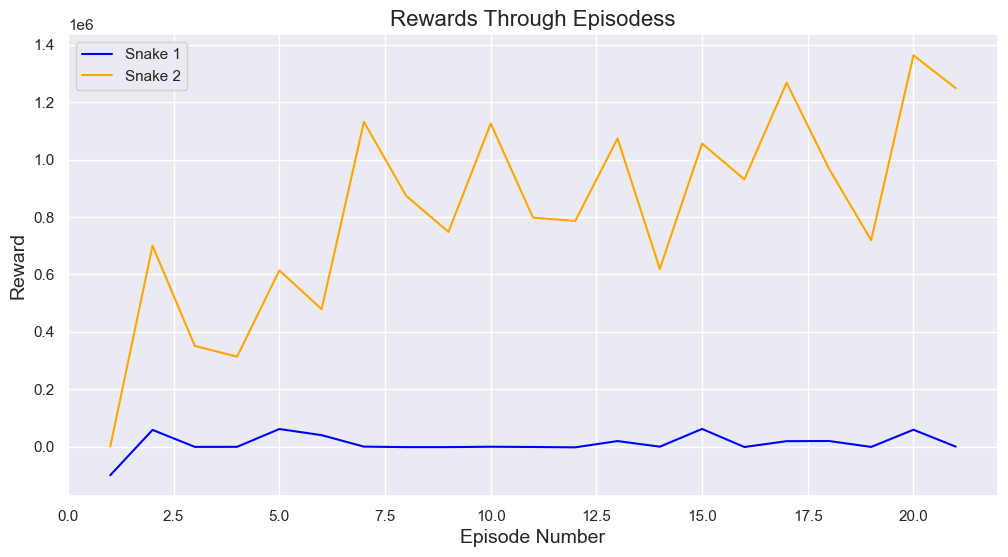

error: display Surface quit

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

: 

In [1]:
import pygame
import random
import numpy as np
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display


# Constants
SNAKE_1_Q_TABLE = "s1_qtble.npy"
SNAKE_2_Q_TABLE = "s2_qtble.npy"


WIDTH = 500
HEIGHT = 500
ROWS = 20

# Hyperparameters
ALPHA = 0.04  # Learning rate
GAMMA = 0.90  # Discount factor
EPSILON = 0.0005  # Exploration rate
EPSILON_DECAY = 0.1

class Cube:
    rows = 20
    w = 500

    def __init__(self, start, dirnx=1, dirny=0, color=(255, 0, 0)):
        self.pos = start
        self.dirnx = dirnx
        self.dirny = dirny
        self.color = color

    def move(self, dirnx, dirny):
        self.dirnx = dirnx
        self.dirny = dirny
        self.pos = (self.pos[0] + self.dirnx, self.pos[1] + self.dirny)

    def draw(self, surface, eyes=False):
        dis = self.w // self.rows
        i = self.pos[0]
        j = self.pos[1]

        pygame.draw.rect(surface, self.color, (i * dis + 1, j * dis + 1, dis - 2, dis - 2))
        
        if eyes:
            centre = dis // 2
            radius = 3
            circleMiddle = (i * dis + centre - radius, j * dis + 8)
            circleMiddle2 = (i * dis + dis - radius * 2, j * dis + 8)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle, radius)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle2, radius)

def redrawWindow(snake_1, snake_2, snack, win):
    win.fill((0, 0, 0))
    drawGrid(WIDTH, ROWS, win)
    snake_1.draw(win)
    snake_2.draw(win)
    snack.draw(win)
    pygame.display.update()

def drawGrid(w, rows, surface):
    sizeBtwn = w // rows
    x = 0
    y = 0
    for l in range(rows):
        x = x + sizeBtwn
        y = y + sizeBtwn
        pygame.draw.line(surface, (255, 255, 255), (x, 0), (x, w))
        pygame.draw.line(surface, (255, 255, 255), (0, y), (w, y))

    wall_color = (139, 69, 19)  # Brown color
    for i in range(rows):
        pygame.draw.rect(surface, wall_color, (0, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, ((rows - 1) * sizeBtwn, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, 0, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, (rows - 1) * sizeBtwn, sizeBtwn, sizeBtwn))

def randomSnack(rows, item):
    positions = item.body
    while True:
        x = random.randrange(1, rows - 1)
        y = random.randrange(1, rows - 1)
        if len(list(filter(lambda z: z.pos == (x, y), positions))) > 0:
            continue
        else:
            break
    return (x, y)

def save(snake_1, snake_2):
    snake_1.save_q_table(SNAKE_1_Q_TABLE)
    snake_2.save_q_table(SNAKE_2_Q_TABLE)

def reset(snake_1, snake_2):
    snake_1.reset((5, 5))
    snake_2.reset((15, 15))


class Snake:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
        except:
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = 0.1
        self.discount_factor = 0.95
        self.epsilon = 0.00
        self.ep_decay = EPSILON_DECAY
        self.iter = 0

    def get_death_pos(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        board[self.head.pos[0], self.head.pos[1]] = 1
        board[other_snake.head.pos[0], other_snake.head.pos[1]] = 1
        for i, c in enumerate(self.body): 
            if i != len(self.body) - 1:
                board[c.pos[0], c.pos[1]] = 1
        for i, c in enumerate(other_snake.body):
            if i == len(other_snake.body) - 1 or i == len(other_snake.body) - 2:
                board[c.pos[0], c.pos[1]] = 2
            else:
                board[c.pos[0], c.pos[1]] = 1
        return board
    
    def is_not_trap(self, death_pos, action):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if action == 0 and self.dirnx == -1 and death_pos[head_r-2][head_c] == 2:
            return False
        elif action == 1 and self.dirnx == 1 and death_pos[head_r+2][head_c] == 2:
            return False
        elif action == 2 and self.dirny == -1 and death_pos[head_r][head_c-2] == 2:
            return False
        elif action == 3 and self.dirny == 1 and death_pos[head_r][head_c+2] == 2:
            return False
        return True
    
    def get_optimal_policy(self, state, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        death_pos = self.get_death_pos(other_snake)
        for i in range(4):
            action = list(reversed(np.argsort(self.q_table[state])))[i]
            if action == 0 and self.dirnx != 1 and death_pos[head_r-1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Left
                break
            elif action == 1 and self.dirnx != -1 and death_pos[head_r+1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Right
                break
            elif action == 2 and self.dirny != 1 and death_pos[head_r, head_c-1] == 0 and self.is_not_trap(death_pos, action):  # Up
                break
            elif action == 3 and self.dirny != -1 and death_pos[head_r, head_c+1] == 0 and self.is_not_trap(death_pos, action):  # Down
                break
            else:
                continue
        return action

    def make_action(self, state, other_snake, flag):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if len(self.body) == 8 and head_r < ROWS-3 and head_r >= 3 and head_c < ROWS-3 and head_c >= 3 and flag:
            if self.iter == 1:
                self.iter = 0
                if self.dirnx == 1:
                    action = 3
                elif self.dirnx == -1:
                    action = 2
                elif self.dirny == 1:
                    action = 0
                else:
                    action = 1
            else:
                self.iter += 1
                if self.dirnx == 1:
                    action = 1
                elif self.dirnx == -1:
                    action = 0
                elif self.dirny == 1:
                    action = 3
                else:
                    action = 2
        else:
            chance = random.random()
            if chance < self.epsilon:
                action = random.randint(0, 3)
            else:
                action = self.get_optimal_policy(state, other_snake)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.epsilon *= self.ep_decay
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 

    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < ROWS and r >= 0 and c < ROWS and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = other_snake.head.pos[0], other_snake.head.pos[1]
        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state, other_snake, False)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def is_right_path(self, state):
        sum = 0
        for i in range(4):
            sum += state[i+4]
        if sum == 1:
            return True
        else:
            return False

    def do_not_turn(self):
        # head_r, head_c = self.head.pos[0], self.head.pos[1]
        # board = np.zeros((ROWS, ROWS))
        # for c in self.body: 
        #     board[c.pos[0], c.pos[1]] = 1
        if len(self.body) >= 3:
            if self.body[0].pos[0] == self.body[2].pos[0] or self.body[0].pos[1] == self.body[2].pos[1]:
                return True
            else:
                return False
        else:
            return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -100000
            win_other = True
        elif other_snake.check_out_of_board():
            win_self = True

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 20000

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 1000
            win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, other_snake.body[1:])):
            win_self = True

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 1000
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 10
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                    reset(self, other_snake)
                else:
                    reward -= 10
                    win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, self.body)):
            if self.head.pos != other_snake.head.pos:
                win_self = True
            else:
                if len(other_snake.body) > len(self.body):
                    win_other = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    win_self = True

        state = self.get_state(snack, other_snake)
        for i in range(4):
            if (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state)):
                reward -= 30
            elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False):
                reward -= 10
            elif (state[i] == 1 and state[i+4] == 0):
                reward += 50
            else:
                reward -= 10

        if (win_self or win_other):
            reset(self, other_snake)

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)


       


class Snake2:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
        except:
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = 0.1
        self.discount_factor = 0.95
        self.epsilon = 0.00
        self.iter = 0

    def get_death_pos(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        board[self.head.pos[0], self.head.pos[1]] = 1
        board[other_snake.head.pos[0], other_snake.head.pos[1]] = 1
        for i, c in enumerate(self.body): 
            if i != len(self.body) - 1:
                board[c.pos[0], c.pos[1]] = 1
        for i, c in enumerate(other_snake.body):
            if i == len(other_snake.body) - 1 or i == len(other_snake.body) - 2:
                board[c.pos[0], c.pos[1]] = 2
            else:
                board[c.pos[0], c.pos[1]] = 1
        return board
    
    def is_not_trap(self, death_pos, action):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if action == 0 and self.dirnx == -1 and death_pos[head_r-2][head_c] == 2:
            return False
        elif action == 1 and self.dirnx == 1 and death_pos[head_r+2][head_c] == 2:
            return False
        elif action == 2 and self.dirny == -1 and death_pos[head_r][head_c-2] == 2:
            return False
        elif action == 3 and self.dirny == 1 and death_pos[head_r][head_c+2] == 2:
            return False
        return True
    
    def get_optimal_policy(self, state, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        death_pos = self.get_death_pos(other_snake)
        for i in range(4):
            action = list(reversed(np.argsort(self.q_table[state])))[i]
            if action == 0 and self.dirnx != 1 and death_pos[head_r-1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Left
                break
            elif action == 1 and self.dirnx != -1 and death_pos[head_r+1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Right
                break
            elif action == 2 and self.dirny != 1 and death_pos[head_r, head_c-1] == 0 and self.is_not_trap(death_pos, action):  # Up
                break
            elif action == 3 and self.dirny != -1 and death_pos[head_r, head_c+1] == 0 and self.is_not_trap(death_pos, action):  # Down
                break
            else:
                continue
        return action

    def make_action(self, state, other_snake, flag):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if len(self.body) == 8 and head_r < ROWS-3 and head_r >= 3 and head_c < ROWS-3 and head_c >= 3 and flag:
            if self.iter == 1:
                self.iter = 0
                if self.dirnx == 1:
                    action = 3
                elif self.dirnx == -1:
                    action = 2
                elif self.dirny == 1:
                    action = 0
                else:
                    action = 1
            else:
                self.iter += 1
                if self.dirnx == 1:
                    action = 1
                elif self.dirnx == -1:
                    action = 0
                elif self.dirny == 1:
                    action = 3
                else:
                    action = 2
        else:
            chance = random.random()
            if chance < self.epsilon:
                action = random.randint(0, 3)
            else:
                action = self.get_optimal_policy(state, other_snake)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 

    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < ROWS and r >= 0 and c < ROWS and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def left_is_more(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 0.3
        board[ROWS-1,:] = 0.3
        board[:,0] = 0.3
        board[:,ROWS-1] = 0.3
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 0.4
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        max_c = len(self.body) - 10 - 1
        max_r = len(self.body) - 10 
        # if max_r > 6:
        #     max_c = 5
        #     max_r = 6
        max_c = 4
        max_r = 5

        if head_c-max_c > 0:
            if head_r - max_r > 0:
                left = np.sum(board[head_r - max_r :head_r,head_c-max_c:head_c+max_c+1])
            else:
                left = np.sum(board[:head_r,head_c-max_c:head_c+max_c+1])
            right = np.sum(board[head_r+1:head_r+max_r+1, head_c-max_c:head_c+max_c+1])
        else: 
            if head_r - max_r > 0:
                left = np.sum(board[head_r - max_r:head_r,:head_c+max_c+1])
            else:
                left = np.sum(board[:head_r,:head_c+max_c+1])
            right = np.sum(board[head_r+1:head_r+max_r+1,:head_c+max_c+1])
 
        if left > right:
            return 1
        else:
            return 0

    def up_is_more(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 0.3
        board[ROWS-1,:] = 0.3
        board[:,0] = 0.3
        board[:,ROWS-1] = 0.3
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 0.4
        head_r, head_c = self.head.pos[0], self.head.pos[1]

        max_r = len(self.body) - 10 - 1
        max_c = len(self.body) - 10 
        # if max_c > 6:
        #     max_r = 5
        #     max_c = 6
        max_r = 4
        max_c = 5

        if head_r-max_r > 0:
            if head_c - max_c > 0:
                up = np.sum(board[head_r-max_r:head_r+max_r+1,head_c-max_c:head_c])
            else:
                up = np.sum(board[head_r-max_r:head_r+max_r+1, :head_c])
            down = np.sum(board[head_r-max_r:head_r+max_r+1, head_c+1:head_c+max_c+1])
        else:
            if head_c-max_c > 0:
                up = np.sum(board[:head_r+max_r+1, head_c-max_c:head_c])
            else:
                up = np.sum(board[:head_r+max_r+1, :head_c])
            down = np.sum(board[:head_r+max_r+1, head_c+1: head_c + max_c + 1])

        if up > down:
            return 1
        else:
            return 0
            


    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = snack.pos[0], snack.pos[1]
        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        state.append(self.left_is_more(other_snake))
        state.append(self.up_is_more(other_snake))
        state.append(int(len(self.body) >= 11))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state, other_snake, False)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def is_right_path(self, state):
        sum = 0
        for i in range(4):
            sum += state[i+4]
        if sum == 1:
            return True
        else:
            return False

    def do_not_turn(self):
        # head_r, head_c = self.head.pos[0], self.head.pos[1]
        # board = np.zeros((ROWS, ROWS))
        # for c in self.body: 
        #     board[c.pos[0], c.pos[1]] = 1
        if len(self.body) >= 3:
            if self.body[0].pos[0] == self.body[2].pos[0] or self.body[0].pos[1] == self.body[2].pos[1]:
                return True
            else:
                return False
        else:
            return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -100000
            win_other = True
        elif other_snake.check_out_of_board():
            win_self = True

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 20000

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 1000
            win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, other_snake.body[1:])):
            win_self = True

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 1000
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 10
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                    reset(self, other_snake)
                else:
                    reward -= 10
                    win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, self.body)):
            if self.head.pos != other_snake.head.pos:
                win_self = True
            else:
                if len(other_snake.body) > len(self.body):
                    win_other = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    win_self = True

        state = self.get_state(snack, other_snake)
        for i in range(4):
            if (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state)):
                reward += 3000
            elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False and self.do_not_turn()):
                reward += 20
            elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False and (i == 0 or i == 1)):
                reward += 5
            elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False):
                reward += 1
            elif (state[i] == 1 and state[i+4] == 0):
                reward -= 100

        if state[12] == 1 and state[1] == 1  and state[14] == 1:
            reward += 80
        elif state[12] == 1 and state[0] == 1 and state[14] == 1:
            reward -= 200
        elif state[12] == 0 and state[1] == 1 and state[14] == 1:
            reward -= 200
        elif state[12] == 0 and state[0] == 1 and state[14] == 1:
            reward += 80

        if state[13] == 1 and state[3] == 1 and state[14] == 1:
            reward += 80
        elif state[13] == 1 and state[2] == 1 and state[14] == 1:
            reward -= 200
        elif state[13] == 0 and state[3] == 1 and state[14] == 1:
            reward -= 200
        elif state[13] == 0 and state[2] == 1 and state[14] == 1:
            reward += 80

        if (win_self or win_other):
            reset(self, other_snake)

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)


def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))

    snake_1 = Snake((255, 0, 0), (0, 0), SNAKE_1_Q_TABLE)
    snake_2 = Snake2((255, 255, 0), (5, 5), SNAKE_2_Q_TABLE)
    snake_1.addCube()
    snake_2.addCube()

    snack = Cube(randomSnack(ROWS, snake_1), color=(0, 255, 0))

    clock = pygame.time.Clock()

    episode = 0
    sum_reward_1 = 0
    sum_reward_2 = 0
    episodes = []
    rewards1 = []
    rewards2 = []
    
    while True:
        reward_1 = 0
        reward_2 = 0
        pygame.time.delay(25)
        clock.tick(10)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                if messagebox.askokcancel("Quit", "Do you want to save the Q-tables?"):
                    save(snake_1, snake_2)
                pygame.quit()
                exit()
            if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
                np.save(SNAKE_1_Q_TABLE, snake_1.q_table)
                np.save(SNAKE_2_Q_TABLE, snake_2.q_table)
                pygame.time.delay(1000)

        state_1, new_state_1, action_1 = snake_1.move(snack, snake_2)
        state_2, new_state_2, action_2 = snake_2.move(snack, snake_1)

        snack, reward_1, win_1, win_2 = snake_1.calc_reward(snack, snake_2)
        snack, reward_2, _, _ = snake_2.calc_reward(snack, snake_1)

        snake_1.update_q_table(state_1, action_1, new_state_1, reward_1)
        snake_2.update_q_table(state_2, action_2, new_state_2, reward_2)

        redrawWindow(snake_1, snake_2, snack, win)

        sum_reward_1 += reward_1
        sum_reward_2 += reward_2
        if (win_1 or win_2):
            reset(snake_1, snake_2)
            episode += 1
            episodes.append(episode)
            rewards1.append(sum_reward_1)
            rewards2.append(sum_reward_2)
            sns.set_theme()
            plt.figure(figsize=(12, 6))  
            plt.plot(episodes, rewards1, linestyle='-', color = "blue", label = "Snake 1")
            plt.plot(episodes, rewards2, linestyle='-', color = "orange", label = "Snake 2")
            plt.xlabel('Episode Number', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title('Rewards Through Episodess', fontsize=16)
            plt.legend()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.clf()

            sum_reward_1 = 0
            sum_reward_2 = 0


if __name__ == "__main__":
    main()


# Model5

In [1]:
import pygame
import random
import numpy as np
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display


# Constants
SNAKE_1_Q_TABLE = "s1_qtble.npy"
SNAKE_2_Q_TABLE = "s2_qtble.npy"


WIDTH = 500
HEIGHT = 500
ROWS = 20

# Hyperparameters
ALPHA = 0.04  # Learning rate
GAMMA = 0.90  # Discount factor
EPSILON = 0.0005  # Exploration rate
EPSILON_DECAY = 0.1

class Cube:
    rows = 20
    w = 500

    def __init__(self, start, dirnx=1, dirny=0, color=(255, 0, 0)):
        self.pos = start
        self.dirnx = dirnx
        self.dirny = dirny
        self.color = color

    def move(self, dirnx, dirny):
        self.dirnx = dirnx
        self.dirny = dirny
        self.pos = (self.pos[0] + self.dirnx, self.pos[1] + self.dirny)

    def draw(self, surface, eyes=False):
        dis = self.w // self.rows
        i = self.pos[0]
        j = self.pos[1]

        pygame.draw.rect(surface, self.color, (i * dis + 1, j * dis + 1, dis - 2, dis - 2))
        
        if eyes:
            centre = dis // 2
            radius = 3
            circleMiddle = (i * dis + centre - radius, j * dis + 8)
            circleMiddle2 = (i * dis + dis - radius * 2, j * dis + 8)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle, radius)
            pygame.draw.circle(surface, (0, 0, 0), circleMiddle2, radius)

def redrawWindow(snake_1, snake_2, snack, win):
    win.fill((0, 0, 0))
    drawGrid(WIDTH, ROWS, win)
    snake_1.draw(win)
    snake_2.draw(win)
    snack.draw(win)
    pygame.display.update()

def drawGrid(w, rows, surface):
    sizeBtwn = w // rows
    x = 0
    y = 0
    for l in range(rows):
        x = x + sizeBtwn
        y = y + sizeBtwn
        pygame.draw.line(surface, (255, 255, 255), (x, 0), (x, w))
        pygame.draw.line(surface, (255, 255, 255), (0, y), (w, y))

    wall_color = (139, 69, 19)  # Brown color
    for i in range(rows):
        pygame.draw.rect(surface, wall_color, (0, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, ((rows - 1) * sizeBtwn, i * sizeBtwn, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, 0, sizeBtwn, sizeBtwn))
        pygame.draw.rect(surface, wall_color, (i * sizeBtwn, (rows - 1) * sizeBtwn, sizeBtwn, sizeBtwn))

def randomSnack(rows, item):
    positions = item.body
    while True:
        x = random.randrange(1, rows - 1)
        y = random.randrange(1, rows - 1)
        if len(list(filter(lambda z: z.pos == (x, y), positions))) > 0:
            continue
        else:
            break
    return (x, y)

def save(snake_1, snake_2):
    snake_1.save_q_table(SNAKE_1_Q_TABLE)
    snake_2.save_q_table(SNAKE_2_Q_TABLE)

def reset(snake_1, snake_2):
    snake_1.reset((5, 5))
    snake_2.reset((15, 15))


class Snake:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
        except:
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = 0.1
        self.discount_factor = 0.95
        self.epsilon = 0.00
        self.ep_decay = EPSILON_DECAY
        self.iter = 0

    def get_death_pos(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        board[self.head.pos[0], self.head.pos[1]] = 1
        board[other_snake.head.pos[0], other_snake.head.pos[1]] = 1
        for i, c in enumerate(self.body): 
            if i != len(self.body) - 1:
                board[c.pos[0], c.pos[1]] = 1
        for i, c in enumerate(other_snake.body):
            if i == len(other_snake.body) - 1 or i == len(other_snake.body) - 2:
                board[c.pos[0], c.pos[1]] = 2
            else:
                board[c.pos[0], c.pos[1]] = 1
        return board
    
    def is_not_trap(self, death_pos, action):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if action == 0 and self.dirnx == -1 and death_pos[head_r-2][head_c] == 2:
            return False
        elif action == 1 and self.dirnx == 1 and death_pos[head_r+2][head_c] == 2:
            return False
        elif action == 2 and self.dirny == -1 and death_pos[head_r][head_c-2] == 2:
            return False
        elif action == 3 and self.dirny == 1 and death_pos[head_r][head_c+2] == 2:
            return False
        return True
    
    def get_optimal_policy(self, state, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        death_pos = self.get_death_pos(other_snake)
        for i in range(4):
            action = list(reversed(np.argsort(self.q_table[state])))[i]
            if action == 0 and self.dirnx != 1 and death_pos[head_r-1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Left
                break
            elif action == 1 and self.dirnx != -1 and death_pos[head_r+1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Right
                break
            elif action == 2 and self.dirny != 1 and death_pos[head_r, head_c-1] == 0 and self.is_not_trap(death_pos, action):  # Up
                break
            elif action == 3 and self.dirny != -1 and death_pos[head_r, head_c+1] == 0 and self.is_not_trap(death_pos, action):  # Down
                break
            else:
                continue
        return action

    def make_action(self, state, other_snake, flag):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if len(self.body) == 8 and head_r < ROWS-3 and head_r >= 3 and head_c < ROWS-3 and head_c >= 3 and flag:
            if self.iter == 1:
                self.iter = 0
                if self.dirnx == 1:
                    action = 3
                elif self.dirnx == -1:
                    action = 2
                elif self.dirny == 1:
                    action = 0
                else:
                    action = 1
            else:
                self.iter += 1
                if self.dirnx == 1:
                    action = 1
                elif self.dirnx == -1:
                    action = 0
                elif self.dirny == 1:
                    action = 3
                else:
                    action = 2
        else:
            chance = random.random()
            if chance < self.epsilon:
                action = random.randint(0, 3)
            else:
                action = self.get_optimal_policy(state, other_snake)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.epsilon *= self.ep_decay
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 

    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < ROWS and r >= 0 and c < ROWS and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = other_snake.head.pos[0], other_snake.head.pos[1]
        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state, other_snake, False)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def is_right_path(self, state):
        sum = 0
        for i in range(4):
            sum += state[i+4]
        if sum == 1:
            return True
        else:
            return False

    def do_not_turn(self):
        # head_r, head_c = self.head.pos[0], self.head.pos[1]
        # board = np.zeros((ROWS, ROWS))
        # for c in self.body: 
        #     board[c.pos[0], c.pos[1]] = 1
        if len(self.body) >= 3:
            if self.body[0].pos[0] == self.body[2].pos[0] or self.body[0].pos[1] == self.body[2].pos[1]:
                return True
            else:
                return False
        else:
            return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -100000
            win_other = True
        elif other_snake.check_out_of_board():
            win_self = True

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 20000

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 1000
            win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, other_snake.body[1:])):
            win_self = True

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 1000
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 10
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                    reset(self, other_snake)
                else:
                    reward -= 10
                    win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, self.body)):
            if self.head.pos != other_snake.head.pos:
                win_self = True
            else:
                if len(other_snake.body) > len(self.body):
                    win_other = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    win_self = True

        state = self.get_state(snack, other_snake)
        for i in range(4):
            if (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state)):
                reward -= 30
            elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False):
                reward -= 10
            elif (state[i] == 1 and state[i+4] == 0):
                reward += 50
            else:
                reward -= 10

        if (win_self or win_other):
            reset(self, other_snake)

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)


class Snake2:
    body = []
    turns = {}

    def __init__(self, color, pos, file_name=None):
        self.color = color
        self.head = Cube(pos, color=color)
        self.body.append(self.head)
        self.dirnx = 0
        self.dirny = 1
        try:
            self.q_table = np.load(file_name)
        except:
            self.q_table = np.zeros((2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4))

        self.lr = 0.1
        self.discount_factor = 0.95
        self.epsilon = 0.00
        self.iter = 0

    def get_death_pos(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        board[self.head.pos[0], self.head.pos[1]] = 1
        board[other_snake.head.pos[0], other_snake.head.pos[1]] = 1
        for i, c in enumerate(self.body): 
            if i != len(self.body) - 1:
                board[c.pos[0], c.pos[1]] = 1
        for i, c in enumerate(other_snake.body):
            if i == len(other_snake.body) - 1 or i == len(other_snake.body) - 2:
                board[c.pos[0], c.pos[1]] = 2
            else:
                board[c.pos[0], c.pos[1]] = 1
        return board
    
    def is_not_trap(self, death_pos, action):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if action == 0 and self.dirnx == -1 and death_pos[head_r-2][head_c] == 2:
            return False
        elif action == 1 and self.dirnx == 1 and death_pos[head_r+2][head_c] == 2:
            return False
        elif action == 2 and self.dirny == -1 and death_pos[head_r][head_c-2] == 2:
            return False
        elif action == 3 and self.dirny == 1 and death_pos[head_r][head_c+2] == 2:
            return False
        return True
    
    def get_optimal_policy(self, state, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        death_pos = self.get_death_pos(other_snake)
        for i in range(4):
            action = list(reversed(np.argsort(self.q_table[state])))[i]
            if action == 0 and self.dirnx != 1 and death_pos[head_r-1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Left
                break
            elif action == 1 and self.dirnx != -1 and death_pos[head_r+1, head_c] == 0 and self.is_not_trap(death_pos, action):  # Right
                break
            elif action == 2 and self.dirny != 1 and death_pos[head_r, head_c-1] == 0 and self.is_not_trap(death_pos, action):  # Up
                break
            elif action == 3 and self.dirny != -1 and death_pos[head_r, head_c+1] == 0 and self.is_not_trap(death_pos, action):  # Down
                break
            else:
                continue
        return action

    def make_action(self, state, other_snake, flag):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        if len(self.body) == 8 and head_r < ROWS-3 and head_r >= 3 and head_c < ROWS-3 and head_c >= 3 and flag:
            if self.iter == 1:
                self.iter = 0
                if self.dirnx == 1:
                    action = 3
                elif self.dirnx == -1:
                    action = 2
                elif self.dirny == 1:
                    action = 0
                else:
                    action = 1
            else:
                self.iter += 1
                if self.dirnx == 1:
                    action = 1
                elif self.dirnx == -1:
                    action = 0
                elif self.dirny == 1:
                    action = 3
                else:
                    action = 2
        else:
            chance = random.random()
            if chance < self.epsilon:
                action = random.randint(0, 3)
            else:
                action = self.get_optimal_policy(state, other_snake)
        return action

    def update_q_table(self, state, action, next_state, reward):
        self.q_table[state][action] = (1 - self.lr)\
                    * self.q_table[state][action] + self.lr\
                    * (reward + self.discount_factor * max(self.q_table[next_state])) 

    def make_board(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 1
        board[ROWS-1,:] = 1
        board[:,0] = 1
        board[:,ROWS-1] = 1
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 1
        self.board = board

    def is_unsafe(self, r, c):
        if r < ROWS and r >= 0 and c < ROWS and c >= 0:
            if self.board[r, c] == 1:
                return 1
            else:
                return 0
        else:
            return 1

    def left_is_more(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 0.3
        board[ROWS-1,:] = 0.3
        board[:,0] = 0.3
        board[:,ROWS-1] = 0.3
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 0.4
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        max_c = len(self.body) - 10 - 1
        max_r = len(self.body) - 10 
        # if max_r > 6:
        #     max_c = 5
        #     max_r = 6
        max_c = 4
        max_r = 5

        if head_c-max_c > 0:
            if head_r - max_r > 0:
                left = np.sum(board[head_r - max_r :head_r,head_c-max_c:head_c+max_c+1])
            else:
                left = np.sum(board[:head_r,head_c-max_c:head_c+max_c+1])
            right = np.sum(board[head_r+1:head_r+max_r+1, head_c-max_c:head_c+max_c+1])
        else: 
            if head_r - max_r > 0:
                left = np.sum(board[head_r - max_r:head_r,:head_c+max_c+1])
            else:
                left = np.sum(board[:head_r,:head_c+max_c+1])
            right = np.sum(board[head_r+1:head_r+max_r+1,:head_c+max_c+1])
 
        if left > right:
            return 1
        else:
            return 0

    def up_is_more(self, other_snake):
        board = np.zeros((ROWS, ROWS))
        board[0,:] = 0.3
        board[ROWS-1,:] = 0.3
        board[:,0] = 0.3
        board[:,ROWS-1] = 0.3
        for c in self.body: 
            board[c.pos[0], c.pos[1]] = 1
        for c in other_snake.body:
            board[c.pos[0], c.pos[1]] = 0.4
        head_r, head_c = self.head.pos[0], self.head.pos[1]

        max_r = len(self.body) - 10 - 1
        max_c = len(self.body) - 10 
        # if max_c > 6:
        #     max_r = 5
        #     max_c = 6
        max_r = 4
        max_c = 5

        if head_r-max_r > 0:
            if head_c - max_c > 0:
                up = np.sum(board[head_r-max_r:head_r+max_r+1,head_c-max_c:head_c])
            else:
                up = np.sum(board[head_r-max_r:head_r+max_r+1, :head_c])
            down = np.sum(board[head_r-max_r:head_r+max_r+1, head_c+1:head_c+max_c+1])
        else:
            if head_c-max_c > 0:
                up = np.sum(board[:head_r+max_r+1, head_c-max_c:head_c])
            else:
                up = np.sum(board[:head_r+max_r+1, :head_c])
            down = np.sum(board[:head_r+max_r+1, head_c+1: head_c + max_c + 1])

        if up > down:
            return 1
        else:
            return 0
            


    def get_state(self, snack, other_snake):
        head_r, head_c = self.head.pos[0], self.head.pos[1]
        food_r, food_c = snack.pos[0], snack.pos[1]
        target_r, target_c = other_snake.head.pos[0] + 1*other_snake.dirnx, other_snake.head.pos[1] + 1 * other_snake.dirny
        if len(self.body) > 7:
            head_rb, head_cb = self.body[7].pos[0], self.body[7].pos[1]
        else:
            head_rb, head_cb = self.head.pos[0], self.head.pos[1]

        self.make_board(other_snake)
        state = []
        state.append(int(self.dirnx == -1))      # Left
        state.append(int(self.dirnx == 1))       # Right
        state.append(int(self.dirny == -1))      # Up
        state.append(int(self.dirny == 1))       # Down
        state.append(int(food_r < head_r))       
        state.append(int(food_r > head_r))       
        state.append(int(food_c < head_c))       
        state.append(int(food_c > head_c))       
        state.append(self.is_unsafe(head_r + 1, head_c))
        state.append(self.is_unsafe(head_r - 1, head_c))
        state.append(self.is_unsafe(head_r, head_c + 1))
        state.append(self.is_unsafe(head_r, head_c - 1))
        state.append(self.left_is_more(other_snake))
        state.append(self.up_is_more(other_snake))
        state.append(int(len(self.body) >= 11))
        state.append(int(target_r < head_rb))       
        state.append(int(target_r > head_rb))       
        state.append(int(target_c < head_cb))       
        state.append(int(target_c > head_cb))
        return tuple(state)
    
    def move(self, snack, other_snake):
        state = self.get_state(snack, other_snake)
        action = self.make_action(state, other_snake, False)

        if action == 0 and (self.dirnx != 1):  # Left
            self.dirnx = -1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 1 and (self.dirnx != -1):  # Right
            self.dirnx = 1
            self.dirny = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 2 and (self.dirny != 1):  # Up
            self.dirny = -1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]
        elif action == 3 and (self.dirny != -1):  # Down
            self.dirny = 1
            self.dirnx = 0
            self.turns[self.head.pos[:]] = [self.dirnx, self.dirny]

        for i, c in enumerate(self.body):
            p = c.pos[:]
            if p in self.turns:
                turn = self.turns[p]
                c.move(turn[0], turn[1])
                if i == len(self.body) - 1:
                    self.turns.pop(p)
            else:
                c.move(c.dirnx, c.dirny)

        next_state = self.get_state(snack, other_snake)
        return state, next_state, action

    def check_out_of_board(self):
        headPos = self.head.pos
        if headPos[0] >= ROWS - 1 or headPos[0] < 1 or headPos[1] >= ROWS - 1 or headPos[1] < 1:
            self.reset((random.randint(3, 18), random.randint(3, 18)))
            return True
        return False

    def is_right_path(self, state):
        sum = 0
        for i in range(4):
            sum += state[i+4]
        if sum == 1:
            return True
        else:
            return False

    def do_not_turn(self):
        # head_r, head_c = self.head.pos[0], self.head.pos[1]
        # board = np.zeros((ROWS, ROWS))
        # for c in self.body: 
        #     board[c.pos[0], c.pos[1]] = 1
        if len(self.body) >= 3:
            if self.body[0].pos[0] == self.body[2].pos[0] or self.body[0].pos[1] == self.body[2].pos[1]:
                return True
            else:
                return False
        else:
            return False

    def calc_reward(self, snack, other_snake):
        reward = 0
        win_self, win_other = False, False

        if self.check_out_of_board():
            reward = -100000
            win_other = True
        elif other_snake.check_out_of_board():
            win_self = True

        if self.head.pos == snack.pos:
            self.addCube()
            snack = Cube(randomSnack(ROWS, self), color=(0, 255, 0))
            reward += 20000

        if self.head.pos in list(map(lambda z: z.pos, self.body[1:])):
            reward -= 1000
            win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, other_snake.body[1:])):
            win_self = True

        if self.head.pos in list(map(lambda z: z.pos, other_snake.body)):
            if self.head.pos != other_snake.head.pos:
                reward -= 1000
                win_other = True
            else:
                if len(self.body) > len(other_snake.body):
                    reward += 10
                    win_self = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                    reset(self, other_snake)
                else:
                    reward -= 10
                    win_other = True
        elif other_snake.head.pos in list(map(lambda z: z.pos, self.body)):
            if self.head.pos != other_snake.head.pos:
                win_self = True
            else:
                if len(other_snake.body) > len(self.body):
                    win_other = True
                elif len(self.body) == len(other_snake.body):
                    reward += 0
                else:
                    win_self = True

        state = self.get_state(snack, other_snake)
        if state[14] == 0:
            for i in range(4):
                if (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state)):
                    reward += 3000
                elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False and self.do_not_turn()):
                    reward += 20
                elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False and (i == 0 or i == 1)):
                    reward += 5
                elif (state[i] == 1 and state[i+4] == 1 and self.is_right_path(state) == False):
                    reward += 1
                elif (state[i] == 1 and state[i+4] == 0):
                    reward -= 100
        else:
            for i in range(4):
                if (state[i] == 1 and state[i+15] == 1 and self.is_right_path(state)):
                    reward += 3000
                elif (state[i] == 1 and state[i+15] == 1 and self.is_right_path(state) == False and self.do_not_turn()):
                    reward += 20
                elif (state[i] == 1 and state[i+15] == 1 and self.is_right_path(state) == False and (i == 0 or i == 1)):
                    reward += 5
                elif (state[i] == 1 and state[i+15] == 1 and self.is_right_path(state) == False):
                    reward += 1
                elif (state[i] == 1 and state[i+15] == 0):
                    reward -= 100


        # if state[12] == 1 and state[1] == 1  and state[14] == 1:
        #     reward += 80
        # elif state[12] == 1 and state[0] == 1 and state[14] == 1:
        #     reward -= 200
        # elif state[12] == 0 and state[1] == 1 and state[14] == 1:
        #     reward -= 200
        # elif state[12] == 0 and state[0] == 1 and state[14] == 1:
        #     reward += 80

        # if state[13] == 1 and state[3] == 1 and state[14] == 1:
        #     reward += 80
        # elif state[13] == 1 and state[2] == 1 and state[14] == 1:
        #     reward -= 200
        # elif state[13] == 0 and state[3] == 1 and state[14] == 1:
        #     reward -= 200
        # elif state[13] == 0 and state[2] == 1 and state[14] == 1:
        #     reward += 80

        if (win_self or win_other):
            reset(self, other_snake)

        return snack, reward, win_self, win_other

    def reset(self, pos):
        self.head = Cube(pos, color=self.color)
        self.body = []
        self.body.append(self.head)
        self.turns = {}
        self.dirnx = 0
        self.dirny = 1

    def addCube(self):
        tail = self.body[-1]
        dx, dy = tail.dirnx, tail.dirny

        if dx == 1 and dy == 0:
            self.body.append(Cube((tail.pos[0] - 1, tail.pos[1]), color=self.color))
        elif dx == -1 and dy == 0:
            self.body.append(Cube((tail.pos[0] + 1, tail.pos[1]), color=self.color))
        elif dx == 0 and dy == 1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] - 1), color=self.color))
        elif dx == 0 and dy == -1:
            self.body.append(Cube((tail.pos[0], tail.pos[1] + 1), color=self.color))

        self.body[-1].dirnx = dx
        self.body[-1].dirny = dy

    def draw(self, surface):
        for i, c in enumerate(self.body):
            if i == 0:
                c.draw(surface, True)
            else:
                c.draw(surface)

    def save_q_table(self, file_name):
        np.save(file_name, self.q_table)


            



def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))

    snake_1 = Snake((255, 0, 0), (0, 0), SNAKE_1_Q_TABLE)
    snake_2 = Snake2((255, 255, 0), (5, 5), SNAKE_2_Q_TABLE)
    snake_1.addCube()
    snake_2.addCube()

    snack = Cube(randomSnack(ROWS, snake_1), color=(0, 255, 0))

    clock = pygame.time.Clock()

    episode = 0
    sum_reward_1 = 0
    sum_reward_2 = 0
    episodes = []
    rewards1 = []
    rewards2 = []
    
    while True:
        reward_1 = 0
        reward_2 = 0
        pygame.time.delay(25)
        clock.tick(30)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                if messagebox.askokcancel("Quit", "Do you want to save the Q-tables?"):
                    save(snake_1, snake_2)
                pygame.quit()
                exit()
            if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
                np.save(SNAKE_1_Q_TABLE, snake_1.q_table)
                np.save(SNAKE_2_Q_TABLE, snake_2.q_table)
                pygame.time.delay(1000)

        state_1, new_state_1, action_1 = snake_1.move(snack, snake_2)
        state_2, new_state_2, action_2 = snake_2.move(snack, snake_1)

        snack, reward_1, win_1, win_2 = snake_1.calc_reward(snack, snake_2)
        snack, reward_2, _, _ = snake_2.calc_reward(snack, snake_1)

        snake_1.update_q_table(state_1, action_1, new_state_1, reward_1)
        snake_2.update_q_table(state_2, action_2, new_state_2, reward_2)

        redrawWindow(snake_1, snake_2, snack, win)

        sum_reward_1 += reward_1
        sum_reward_2 += reward_2
        if (win_1 or win_2):
            reset(snake_1, snake_2)
            episode += 1
            episodes.append(episode)
            rewards1.append(sum_reward_1)
            rewards2.append(sum_reward_2)
            sns.set_theme()
            # plt.figure(figsize=(12, 6))  
            # plt.plot(episodes, rewards1, linestyle='-', color = "blue", label = "Snake 1")
            # plt.plot(episodes, rewards2, linestyle='-', color = "orange", label = "Snake 2")
            # plt.xlabel('Episode Number', fontsize=14)
            # plt.ylabel('Reward', fontsize=14)
            # plt.title('Rewards Through Episodess', fontsize=16)
            # plt.legend()
            # display.clear_output(wait=True)
            # display.display(plt.gcf())
            # plt.clf()

            sum_reward_1 = 0
            sum_reward_2 = 0


if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: display Surface quit

: 